<a href="https://colab.research.google.com/github/racoope70/daytrading-with-ml/blob/main/multi_stock_td3_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Fix Potential Library Conflicts
!apt-get remove --purge -y cuda* libcuda* nvidia* || echo "No conflicting CUDA packages"
!apt-get autoremove -y
!apt-get clean

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'cuda-toolkit-12-4-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-7' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-11-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-5-config-common' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-0' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-1' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-2' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-3' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-4' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-5' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-6' for glob 'cuda*'
Note, selecting 'cuda-cudart-dev-12-8' for glob 'cuda*'
Note, selecting 'cuda-toolkit-12-6-config-common' for glob 'cuda*'
Note, selecting 'cuda-opencl-d

In [2]:
#Protocol Buffer Fix (for TensorFlow)
!pip uninstall -y protobuf
!pip install protobuf==3.20.3

Found existing installation: protobuf 5.29.4
Uninstalling protobuf-5.29.4:
  Successfully uninstalled protobuf-5.29.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 3.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.17.0 requires protobuf<6.0.0,>=4.25.2; python_version >= "3.11", but you have protobuf 3.20.3 which is incompatible.
grpcio-status 1.71.0 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 3.20.3 which is incompatible.


In [3]:
#Update Colab Environment and System Libraries
!apt-get update -y && apt-get upgrade -y


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,383 kB]
Hit:7 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,810 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,243 kB]
Get:11 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,684 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages 

In [4]:
#Install Correct Version of CUDA for Colab GPU
!apt-get update -qq && apt-get install -y \
    libcusolver11 libcusparse11 libcurand10 libcufft10 libnppig10 libnppc10 libnppial10 \
    cuda-toolkit-12-4

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libnppig10
E: Unable to locate package libnppc10
E: Unable to locate package libnppial10


In [5]:
#Set Correct CUDA Paths
import os
os.environ['CUDA_HOME'] = '/usr/local/cuda-12.4'
os.environ['PATH'] += ':/usr/local/cuda-12.4/bin'
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/cuda-12.4/lib64'


In [6]:
#Install RAPIDS and NVIDIA Dependencies
!pip install --extra-index-url=https://pypi.nvidia.com \
    cuml-cu12==25.2.0 cudf-cu12==25.2.0 cupy-cuda12x dask-cuda==25.2.0 dask-cudf-cu12==25.2.0


Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 44.4 MB/s eta 0:00:00
  Attempting uninstall: cudf-cu12
    Found existing installation: cudf-cu12 25.2.1
    Uninstalling cudf-cu12-25.2.1:
      Successfully uninstalled cudf-cu12-25.2.1
  Attempting uninstall: dask-cudf-cu12
    Found existing installation: dask-cudf-cu12 25.2.2
    Uninstalling dask-cudf-cu12-25.2.2:
      Successfully uninstalled dask-cudf-cu12-25.2.2
  Attempting uninstall: cuml-cu12
    Found existing installation: cuml-cu12 25.2.1
    Uninstalling cuml-cu12-25.2.1:
      Successfully uninstalled cuml-cu12-25.2.1


In [7]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Install Stable Baselines3 and Trading Libraries
!pip install stable-baselines3[extra] gymnasium gym-anytrading yfinance xgboost joblib

#Install Miscellaneous Libraries
!pip install matplotlib scikit-learn pandas numba==0.61.0

#Install PyTorch with GPU Support
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu124


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.2/172.2 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.5/184.5 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [8]:
#Install TensorFlow (latest GPU-compatible version)
!pip install tensorflow==2.18.0

#Immediately follow it with:
import tensorflow as tf

gpus = tf.config.list_physical_devices("GPU")
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("TensorFlow GPU memory growth enabled")
    except RuntimeError as e:
        print(f"TensorFlow GPU memory config failed: {e}")


In [9]:
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}
#Import Required Libraries
import gc
import json
import os
import random
import time
from collections import deque
from datetime import datetime

import cupy as cp
import cudf
import cuml
import dask
import gymnasium as gym
import gym_anytrading
import joblib
import lightgbm as lgb
import matplotlib.pyplot as plt
import numba
import numpy as np
import pandas as pd
import torch
import xgboost as xgb
import yfinance as yf
from cuml.ensemble import RandomForestClassifier
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from stable_baselines3 import PPO, SAC
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv

#Ticker List and CONFIG
ticker_list = [
    'AAPL', 'TSLA', 'MSFT', 'GOOGL', 'AMZN', 'NVDA', 'META', 'BRK-B', 'JPM', 'JNJ',
    'XOM', 'V', 'PG', 'UNH', 'MA', 'HD', 'LLY', 'MRK', 'PEP', 'KO',
    'BAC', 'ABBV', 'AVGO', 'PFE', 'COST', 'CSCO', 'TMO', 'ABT', 'ACN', 'WMT',
    'MCD', 'ADBE', 'DHR', 'CRM', 'NKE', 'INTC', 'QCOM', 'NEE', 'AMD', 'TXN',
    'AMGN', 'UPS', 'LIN', 'PM', 'UNP', 'BMY', 'LOW', 'RTX', 'CVX', 'IBM',
    'GE', 'SBUX', 'ORCL'
]

strategy_name = "sac_ppo_td3_multi_stock_v1"

CONFIG = {
    'symbols': [],
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying in {attempt * 5} sec...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering Function
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df

#Load, Feature Engineer, and Combine All Tickers
all_dfs = []

for ticker in ticker_list:
    df_single = download_stock_data(ticker, period=CONFIG['period'], interval=CONFIG['interval'])
    if df_single is not None:
        try:
            df_features = compute_enhanced_features(df_single)
            all_dfs.append(df_features)
        except Exception as e:
            print(f"Feature engineering failed for {ticker}: {e}")
    else:
        print(f"Failed to download {ticker}")

#Combine all into a single DataFrame
if all_dfs:
    df = pd.concat(all_dfs, ignore_index=True)
    print(f"Combined dataset created with shape: {df.shape}")
else:
    df = pd.DataFrame()
    print("No data available.")

#Optional: Save combined dataset to disk and Google Drive
if not df.empty:
    #Save locally
    df.to_csv("multi_stock_feature_engineered_dataset.csv", index=False)
    print("Saved locally to multi_stock_feature_engineered_dataset.csv")

    #Save to Google Drive
    drive_path = "/content/drive/MyDrive/trading_data/"
    os.makedirs(drive_path, exist_ok=True)
    df.to_csv(os.path.join(drive_path, "multi_stock_feature_engineered_dataset.csv"), index=False)
    print(f"Also saved to Google Drive at {drive_path}multi_stock_feature_engineered_dataset.csv")


#Download Function
def download_stock_data(ticker, period="720d", interval="1h", max_retries=5):
    for attempt in range(1, max_retries + 1):
        try:
            print(f"Attempt {attempt}: Downloading {ticker}...")
            df = yf.download(ticker, period=period, interval=interval)
            if not df.empty:
                df.reset_index(inplace=True)
                df['Symbol'] = ticker
                return df
            raise ValueError("Empty data")
        except Exception as e:
            print(f"Error: {e}. Retrying...")
            time.sleep(attempt * 5)
    print(f"Failed to download {ticker}")
    return None

#Feature Engineering
def compute_enhanced_features(df):
    df = df.copy()
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)
    df = df.loc[:, ~df.columns.duplicated()]

    df['SMA_20'] = df['Close'].rolling(20).mean()
    df['STD_20'] = df['Close'].rolling(20).std()
    df['Upper_Band'] = df['SMA_20'] + 2 * df['STD_20']
    df['Lower_Band'] = df['SMA_20'] - 2 * df['STD_20']
    df['Lowest_Low'] = df['Low'].rolling(14).min()
    df['Highest_High'] = df['High'].rolling(14).max()
    denom = (df['Highest_High'] - df['Lowest_Low']).replace(0, np.nan)
    df['Stoch'] = ((df['Close'] - df['Lowest_Low']) / denom) * 100
    df['ROC'] = df['Close'].pct_change(10)
    df['OBV'] = (np.sign(df['Close'].diff()) * df['Volume']).cumsum()
    typical_price = (df['High'] + df['Low'] + df['Close']) / 3
    df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())
    df['PROC'] = ((df['Close'] - df['Close'].shift(12)) / df['Close'].shift(12)) * 100
    df['Rolling_Mean_50'] = df['Close'].rolling(50).mean()
    df['Expanding_Mean'] = df['Close'].expanding().mean()
    df['EMA_10'] = df['Close'].ewm(span=10).mean()
    df['EMA_50'] = df['Close'].ewm(span=50).mean()
    df['MACD_Line'] = df['Close'].ewm(span=12).mean() - df['Close'].ewm(span=26).mean()
    df['MACD_Signal'] = df['MACD_Line'].ewm(span=9).mean()
    df['MACD_Hist'] = df['MACD_Line'] - df['MACD_Signal']
    delta = df['Close'].diff()
    gain = delta.where(delta > 0, 0).rolling(14).mean()
    loss = -delta.where(delta < 0, 0).rolling(14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    df['True_Range'] = df[['High', 'Low', 'Close']].apply(
        lambda x: max(x.iloc[0] - x.iloc[1], abs(x.iloc[0] - x.iloc[2]), abs(x.iloc[1] - x.iloc[2])), axis=1)
    df['ATR'] = df['True_Range'].rolling(14).mean()
    df['+DM'] = np.where((df['High'].diff() > df['Low'].diff()) & (df['High'].diff() > 0), df['High'].diff(), 0)
    df['-DM'] = np.where((df['Low'].diff() > df['High'].diff()) & (df['Low'].diff() > 0), df['Low'].diff(), 0)
    df['+DI'] = 100 * df['+DM'].rolling(14).mean() / df['ATR']
    df['-DI'] = 100 * df['-DM'].rolling(14).mean() / df['ATR']
    df['ADX'] = abs(df['+DI'] - df['-DI']).rolling(14).mean()
    df['Volume_Avg'] = df['Volume'].rolling(20).mean()
    df['Volume_Change'] = df['Volume'].pct_change()
    df['Volume_Change_MA'] = df['Volume_Change'].rolling(10).mean()
    df['Volume_Change_Ratio'] = df['Volume_Change'] / df['Volume_Change'].shift(1)
    df['Relative_Volume'] = df['Volume'] / df['Volume_Avg']
    df['Trailing_Stop'] = np.minimum(df['Close'] * 0.985, df['Close'] - (df['ATR'] * 0.3))
    df['Buy_Signal'] = np.where((df['RSI'] < 60) & (df['EMA_10'] > df['EMA_50']) &
                                ((df['MACD_Line'] > df['MACD_Signal']) | (df['MACD_Line'].diff() > 0)) &
                                (df['Volume'] > (0.4 * df['Volume_Avg'])) & (df['ADX'] > 18), 1, 0)
    df['Sell_Signal'] = np.where(((df['EMA_10'] < df['EMA_50']) & (df['RSI'] > 60)) |
                                 ((df['MACD_Line'] < df['MACD_Signal']) & (df['RSI'] > 65)) |
                                 (df['Close'] < df['Trailing_Stop']) |
                                 ((df['Volume'] > 0.5 * df['Volume_Avg']) & (df['ADX'] > 20)), 1, 0)
    df['Sell_Signal_Debug'] = np.where(((df['MACD_Hist'] < 0.5) | (df['MACD_Line'] < df['MACD_Signal'])) &
                                       (df['RSI'] < 55) & (df['ADX'] > 15) &
                                       ((df['Close'] < df['Trailing_Stop']) | (df['EMA_10'] < df['EMA_50'])) &
                                       (df['Volume'] > 0.5 * df['Volume_Avg']), 1, 0)
    df['Future_Close'] = df['Close'].shift(-10)
    df['Volatility'] = df['Close'].pct_change().rolling(window=20).std()
    df['Return'] = (df['Future_Close'] - df['Close']) / df['Close']
    df['Target'] = np.select([df['Return'] > 0.02, df['Return'] < -0.02], [1, -1], default=0)
    df['Multi_Class_Target'] = df['Target']
    df['Hour'] = pd.to_datetime(df['Datetime']).dt.hour
    df['DayOfWeek'] = pd.to_datetime(df['Datetime']).dt.dayofweek
    df['Session'] = np.where((df['Hour'] >= 9) & (df['Hour'] <= 16), 'Regular',
                             np.where((df['Hour'] < 9), 'Pre-market', 'After-hours'))
    df['MACD_Crossover'] = np.where(df['MACD_Line'] > df['MACD_Signal'], 1, 0)
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    df.dropna(inplace=True)
    return df


/usr/local/lib/python3.11/dist-packages/cudf/utils/_ptxcompiler.py:64: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.11/dist-packages/numba_cuda/numba/cuda/cudadrv/driver.py", line 314, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))


Attempt 1: Downloading AAPL...
YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TSLA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MSFT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GOOGL...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMZN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NVDA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading META...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BRK-B...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JPM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading JNJ...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading XOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading V...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PG...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNH...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MA...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading HD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LLY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MRK...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PEP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading KO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BAC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABBV...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AVGO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PFE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading COST...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CSCO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TMO...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ABT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ACN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading WMT...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading MCD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ADBE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading DHR...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CRM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NKE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading INTC...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading QCOM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading NEE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMD...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading TXN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading AMGN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UPS...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LIN...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading PM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading UNP...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading BMY...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading LOW...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading RTX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading CVX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading IBM...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading GE...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading SBUX...


[*********************100%***********************]  1 of 1 completed


Attempt 1: Downloading ORCL...


[*********************100%***********************]  1 of 1 completed


Combined dataset created with shape: (262063, 51)
Saved locally to multi_stock_feature_engineered_dataset.csv
Also saved to Google Drive at /content/drive/MyDrive/trading_data/multi_stock_feature_engineered_dataset.csv


In [12]:
import os
os.path.exists("multi_stock_feature_engineered_dataset.csv")

#Imports
import os
import gc
import time
import torch
import pandas as pd
import numpy as np
from stable_baselines3 import TD3
from stable_baselines3.common.noise import NormalActionNoise
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
import psutil

#Custom Trading Environment
from gym_anytrading.envs import StocksEnv
from gymnasium.spaces import Box

class ContinuousTradingEnv(StocksEnv):
    def __init__(self, df, frame_bound, window_size):
        super().__init__(df=df, frame_bound=frame_bound, window_size=window_size)
        self.action_space = Box(low=-1.0, high=1.0, shape=(1,), dtype=np.float32)

    def step(self, action):
        try:
            #Convert continuous action to discrete
            if action < -0.3:
                discrete_action = 0  #SELL
            elif action > 0.1:
                discrete_action = 1  #BUY
            else:
                discrete_action = 2  #HOLD

            step_result = super().step(discrete_action)

            if len(step_result) == 5:
                obs, reward, terminated, truncated, info = step_result
            else:
                obs, reward, done, info = step_result
                terminated, truncated = done, False

            price_diff = self.df.loc[self._current_tick, 'Close'] - self.df.loc[self._current_tick - 1, 'Close']
            reward += price_diff * discrete_action
            reward = np.clip(reward, -1.0, 1.0)

            return obs, reward, terminated, truncated, info
        except Exception as e:
            print(f"Error during step: {e}")
            return self.reset(), 0, True, True, {}

#Load feature-engineered dataset
if not os.path.exists("multi_stock_feature_engineered_dataset.csv"):
    raise FileNotFoundError("Required feature-engineered dataset not found!")

df = pd.read_csv("multi_stock_feature_engineered_dataset.csv")
if 'Datetime' in df.columns:
    df['Datetime'] = pd.to_datetime(df['Datetime'])

#Define CONFIG for TD3
strategy_name = "td3_multi_stock_v1"
ticker_list = df['Symbol'].unique().tolist()

CONFIG = {
    'symbols': ticker_list,
    'period': '720d',
    'interval': '1h',
    'target': 'Target',
    'sharpe_threshold': 1.5,
    'return_threshold': 1.25,
    'strategy_name': strategy_name
}

print("Environment and data loaded successfully. Ready for TD3 training!")


Environment and data loaded successfully. Ready for TD3 training!


In [17]:
import os
import gc
import time
import torch
import pandas as pd
import numpy as np
from stable_baselines3 import TD3
from stable_baselines3.common.vec_env import DummyVecEnv
from stable_baselines3.common.monitor import Monitor
from stable_baselines3.common.noise import NormalActionNoise
import psutil

#Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

test_mode = False
test_symbol = 'AAPL'
test_timesteps = 2000
enable_plotting = False
limit_symbols = 53
reduced_mode = True
resume_from_symbol = None

#Filter high-volume stocks
filtered_symbols = df.groupby('Symbol').filter(lambda x: x['Volume'].mean() > 1_000_000)['Symbol'].unique()
symbols_to_run = [test_symbol] if test_mode else filtered_symbols[:limit_symbols]

if resume_from_symbol in symbols_to_run:
    resume_index = symbols_to_run.index(resume_from_symbol)
    symbols_to_run = symbols_to_run[resume_index:]

print("TEST MODE:", test_mode)
print(f"Symbols to run: {symbols_to_run}")

#Train and Evaluate TD3 models
performance_summary = []
missing_models = []
start_time = time.time()

for i, symbol in enumerate(symbols_to_run):
    print(f"\nTraining TD3 model for: {symbol}")
    df_symbol = df[df['Symbol'] == symbol].dropna(subset=['Close']).reset_index(drop=True)
    frame_bound = (50, len(df_symbol))

    try:
        env = DummyVecEnv([lambda: ContinuousTradingEnv(df=df_symbol, frame_bound=frame_bound, window_size=10)])

        n_actions = env.action_space.shape[-1]
        action_noise = NormalActionNoise(mean=np.zeros(n_actions), sigma=0.1 * np.ones(n_actions))

        model = TD3(
            "MlpPolicy",
            env,
            learning_rate=3e-4,
            buffer_size=1000000,
            batch_size=256,
            tau=0.005,
            gamma=0.99,
            action_noise=action_noise,
            train_freq=(1, "episode"),
            policy_kwargs=dict(net_arch=[64, 64]),
            verbose=0,
            device=device
        )

        timesteps = 100000
        model.learn(total_timesteps=test_timesteps if test_mode else timesteps)
        model.save(f"td3_{symbol.lower()}")
        print(f"Model saved for {symbol}")

        #Run trading strategy
        obs = env.reset()
        trade_log, buy_price = [], None

        for j in range(len(df_symbol)):
            action, _ = model.predict(obs, deterministic=True)
            step_result = env.step(action)
            obs = step_result[0] if len(step_result) == 5 else step_result[0]

            action_value = float(action.flatten()[0])
            current_price = df_symbol['Close'].iloc[j]

            if action_value > 0.3 and buy_price is None:
                trade_log.append("BUY")

            if action_value > 0.3 and buy_price is None:
                trade_log.append("BUY")
                buy_price = current_price
            elif action_value < -0.3 and buy_price is not None:
                trade_log.append("SELL")
                buy_price = None
            else:
                trade_log.append("HOLD")

        #Harmonize signal length
        trade_log = trade_log[:len(df_symbol)] + ["HOLD"] * (len(df_symbol) - len(trade_log))
        df_symbol["TD3_Trade_Signal"] = trade_log

        #Save results
        df_symbol.to_csv(f"td3_results_{symbol}.csv", index=False)

        #Collect performance stats
        buy_count = trade_log.count("BUY")
        sell_count = trade_log.count("SELL")

        if buy_count == 0 and sell_count == 0:
            print(f"No trades made for {symbol} — consider adjusting thresholds or model settings.")

        returns = df_symbol['Close'].pct_change().dropna()
        avg_return = returns.mean()
        std_dev = returns.std()
        risk_adjusted = avg_return / std_dev if std_dev else 0

        performance_summary.append({
            "Symbol": symbol,
            "Buy_Count": buy_count,
            "Sell_Count": sell_count,
            "Risk_Adjusted_Score": round(risk_adjusted, 4)
        })

        #Intermediate save
        pd.DataFrame(performance_summary).to_csv("td3_performance_summary_progress.csv", index=False)

        if (i + 1) % 5 == 0:
            print(f"Memory used: {psutil.virtual_memory().used / 1e9:.2f} GB")

        elapsed = (time.time() - start_time) / 60
        remaining = (len(symbols_to_run) - (i + 1)) * (elapsed / (i + 1))
        print(f"Elapsed: {elapsed:.2f} min | Est. Remaining: {remaining:.2f} min")

    except Exception as e:
        print(f"Training failed for {symbol}: {e}")
        missing_models.append(symbol)
    finally:
        del model, env, df_symbol
        gc.collect()
        torch.cuda.empty_cache()

#Final summary save
if performance_summary:
    pd.DataFrame(performance_summary).to_csv("td3_performance_summary.csv", index=False)
    print("Saved final TD3 performance summary.")

if missing_models:
    print(f"{len(missing_models)} model(s) missing: {', '.join(missing_models)}")


Using device: cpu
TEST MODE: False
Symbols to run: ['AAPL' 'TSLA' 'MSFT' 'GOOGL' 'AMZN' 'NVDA' 'META' 'JPM' 'XOM' 'KO' 'BAC'
 'AVGO' 'PFE' 'CSCO' 'WMT' 'NKE' 'INTC' 'NEE' 'AMD' 'BMY' 'ORCL']

Training TD3 model for: AAPL
Model saved for AAPL
No trades made for AAPL — consider adjusting thresholds or model settings.
Elapsed: 1.29 min | Est. Remaining: 25.73 min

Training TD3 model for: TSLA
Model saved for TSLA
No trades made for TSLA — consider adjusting thresholds or model settings.
Elapsed: 2.58 min | Est. Remaining: 24.46 min

Training TD3 model for: MSFT
Model saved for MSFT
No trades made for MSFT — consider adjusting thresholds or model settings.
Elapsed: 3.86 min | Est. Remaining: 23.14 min

Training TD3 model for: GOOGL
Model saved for GOOGL
Elapsed: 5.15 min | Est. Remaining: 21.87 min

Training TD3 model for: AMZN
Model saved for AMZN
No trades made for AMZN — consider adjusting thresholds or model settings.
Memory used: 2.44 GB
Elapsed: 6.43 min | Est. Remaining: 20.59 min



In [18]:
import gc
gc.collect

<function gc.collect(generation=2)>

In [20]:
import os, gc, json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

#Load performance summary
summary_path = "td3_performance_summary.csv"
if not os.path.exists(summary_path):
    raise FileNotFoundError("Missing 'td3_performance_summary.csv' – run inference first.")

performance_df = pd.read_csv(summary_path)
global_results = []

initial_balance = 100000

def generate_filename(stock, model="td3", version="v2", ext="json", use_date=True):
    date_str = datetime.now().strftime("%Y-%m-%d") if use_date else ""
    return f"{stock}_{model}_{version}{'_' + date_str if use_date else ''}.{ext}"

def save_results(stock, final_value, cumulative_return, sharpe, drawdown, trade_log, version="v2"):
    json_path = generate_filename(stock, "td3", version, "json")
    with open(json_path, "w") as f:
        json.dump({
            "model_name": "TD3",
            "final_value": final_value,
            "cumulative_return": cumulative_return,
            "sharpe_ratio": sharpe,
            "max_drawdown": drawdown,
            "trade_log": trade_log[:10]  #Preview
        }, f, indent=2)

    csv_path = generate_filename(stock, "td3", version, "csv")
    pd.DataFrame(trade_log, columns=["Trade Signal"]).to_csv(csv_path, index=False)
    print(f"Saved {stock} → JSON: {json_path}, CSV: {csv_path}")

def run_evaluation(stock):
    result_path = f"td3_results_{stock}.csv"
    if not os.path.exists(result_path):
        print(f"Missing result CSV for {stock}")
        return

    df = pd.read_csv(result_path)
    if "TD3_Trade_Signal" not in df.columns:
        print(f"No trade signal column in {result_path}")
        return

    trade_log = df["TD3_Trade_Signal"].tolist()
    df = df.reset_index(drop=True)
    df = df.iloc[50:].reset_index(drop=True)
    trade_log = trade_log[:len(df)]  #match length

    #Backtest strategy
    balance, position = initial_balance, 0
    portfolio = []

    for i, trade in enumerate(trade_log):
        if i + 50 >= len(df):
            break
        price = df['Close'].iloc[i + 50]
        if trade == "BUY" and position == 0:
            position = balance / price
            balance = 0
        elif trade == "SELL" and position > 0:
            balance = position * price
            position = 0
        portfolio.append(balance if balance > 0 else position * price)

    if not portfolio:
        print(f"No trades or portfolio entries for {stock}")
        return

    #Metrics
    final_value = portfolio[-1]
    hold_value = (initial_balance / df['Close'].iloc[0]) * df['Close'].iloc[-1]
    returns = pd.Series(portfolio).pct_change().fillna(0)
    sharpe = (returns.mean() / returns.std()) * np.sqrt(252) if returns.std() != 0 else 0
    drawdown = ((pd.Series(portfolio).cummax() - pd.Series(portfolio)) / pd.Series(portfolio).cummax()).max() * 100
    cumulative = ((final_value / initial_balance) - 1) * 100
    winner = "TD3" if final_value > hold_value else "Buy & Hold"

    #Plot
    try:
        aligned_dates = df['Datetime'].iloc[50:50 + len(portfolio)].values if "Datetime" in df.columns else df.index[:len(portfolio)]
        aligned_prices = df['Close'].iloc[50:50 + len(portfolio)].values

        plt.figure(figsize=(12, 6))
        plt.plot(aligned_dates, aligned_prices, label='Close Price', alpha=0.4)
        plt.plot(aligned_dates, portfolio, label='TD3 Portfolio Value')
        plt.title(f"{stock} TD3 Trading Strategy")
        plt.xlabel("Date")
        plt.ylabel("Portfolio Value ($)")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.savefig(f"{stock}_td3_portfolio_plot.png")
        plt.close()
        print(f"Plot saved: {stock}_td3_portfolio_plot.png")
    except Exception as e:
        print(f"Plot failed for {stock}: {e}")

    #Save
    save_results(stock, final_value, cumulative, sharpe, drawdown, trade_log)
    global_results.append({
        "Symbol": stock,
        "TD3_Portfolio_Value": round(final_value, 2),
        "Buy_Hold_Value": round(hold_value, 2),
        "Cumulative_Return_%": round(cumulative, 2),
        "Sharpe": round(sharpe, 2),
        "Max_Drawdown_%": round(drawdown, 2),
        "Winner": winner
    })

#Run for all stocks
for stock in performance_df["Symbol"]:
    print(f"\nEvaluating {stock}...")
    run_evaluation(stock)
    gc.collect()

#Save final summary
summary_df = pd.DataFrame(global_results)
summary_df.to_csv("td3_strategy_evaluation_summary.csv", index=False)
print("\nAll evaluations completed and saved to: td3_strategy_evaluation_summary.csv")



Evaluating AAPL...
Plot saved: AAPL_td3_portfolio_plot.png
Saved AAPL → JSON: AAPL_td3_v2_2025-04-08.json, CSV: AAPL_td3_v2_2025-04-08.csv

Evaluating TSLA...
Plot saved: TSLA_td3_portfolio_plot.png
Saved TSLA → JSON: TSLA_td3_v2_2025-04-08.json, CSV: TSLA_td3_v2_2025-04-08.csv

Evaluating MSFT...
Plot saved: MSFT_td3_portfolio_plot.png
Saved MSFT → JSON: MSFT_td3_v2_2025-04-08.json, CSV: MSFT_td3_v2_2025-04-08.csv

Evaluating GOOGL...
Plot saved: GOOGL_td3_portfolio_plot.png
Saved GOOGL → JSON: GOOGL_td3_v2_2025-04-08.json, CSV: GOOGL_td3_v2_2025-04-08.csv

Evaluating AMZN...
Plot saved: AMZN_td3_portfolio_plot.png
Saved AMZN → JSON: AMZN_td3_v2_2025-04-08.json, CSV: AMZN_td3_v2_2025-04-08.csv

Evaluating NVDA...
Plot saved: NVDA_td3_portfolio_plot.png
Saved NVDA → JSON: NVDA_td3_v2_2025-04-08.json, CSV: NVDA_td3_v2_2025-04-08.csv

Evaluating META...
Plot saved: META_td3_portfolio_plot.png
Saved META → JSON: META_td3_v2_2025-04-08.json, CSV: META_td3_v2_2025-04-08.csv

Evaluating JPM


Top 5 TD3 Strategy Performers:
   Symbol  TD3_Portfolio_Value  Cumulative_Return_%  Sharpe  Max_Drawdown_%
5    NVDA            562407.62               462.41    0.55           42.02
11   AVGO            295325.10               195.33    0.44           43.38
14    WMT            203153.63               103.15    0.52           20.49
20   ORCL            184500.86                84.50    0.32           34.35
7     JPM            181564.97                81.56    0.38           24.77


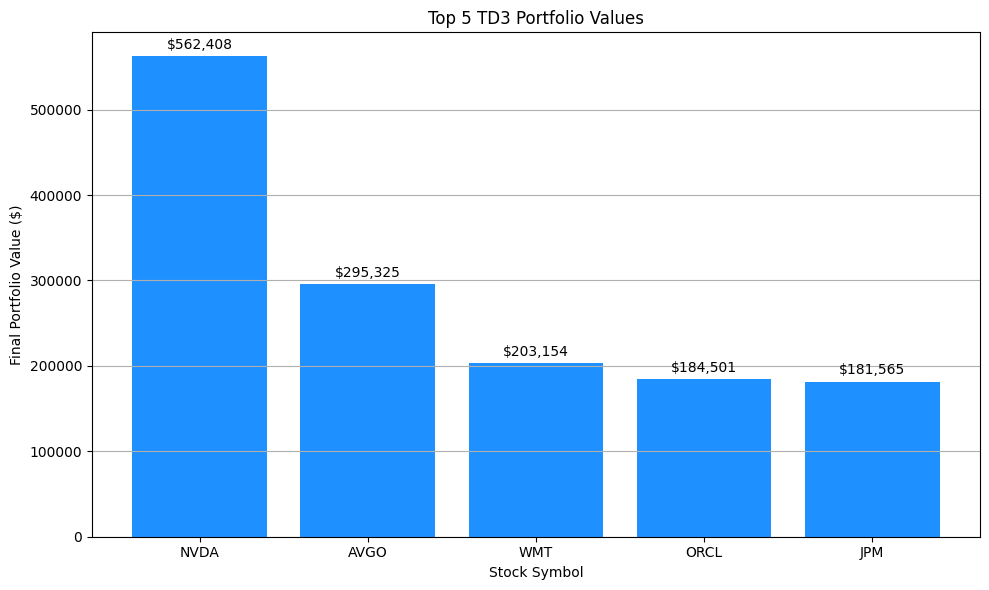

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

#Load TD3 evaluation results
summary_df = pd.read_csv("td3_strategy_evaluation_summary.csv")

#Get top 5 based on TD3 portfolio value
top_performers = summary_df.sort_values(by="TD3_Portfolio_Value", ascending=False).head(5)

#Print summary
print("\nTop 5 TD3 Strategy Performers:")
print(top_performers[["Symbol", "TD3_Portfolio_Value", "Cumulative_Return_%", "Sharpe", "Max_Drawdown_%"]])

#Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(top_performers["Symbol"], top_performers["TD3_Portfolio_Value"], color='dodgerblue')
plt.title("Top 5 TD3 Portfolio Values")
plt.ylabel("Final Portfolio Value ($)")
plt.xlabel("Stock Symbol")
plt.grid(axis='y')

#Annotate bars with values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f"${height:,.0f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [23]:
#Free GPU Memory Before Training
gc.collect()
torch.cuda.empty_cache()

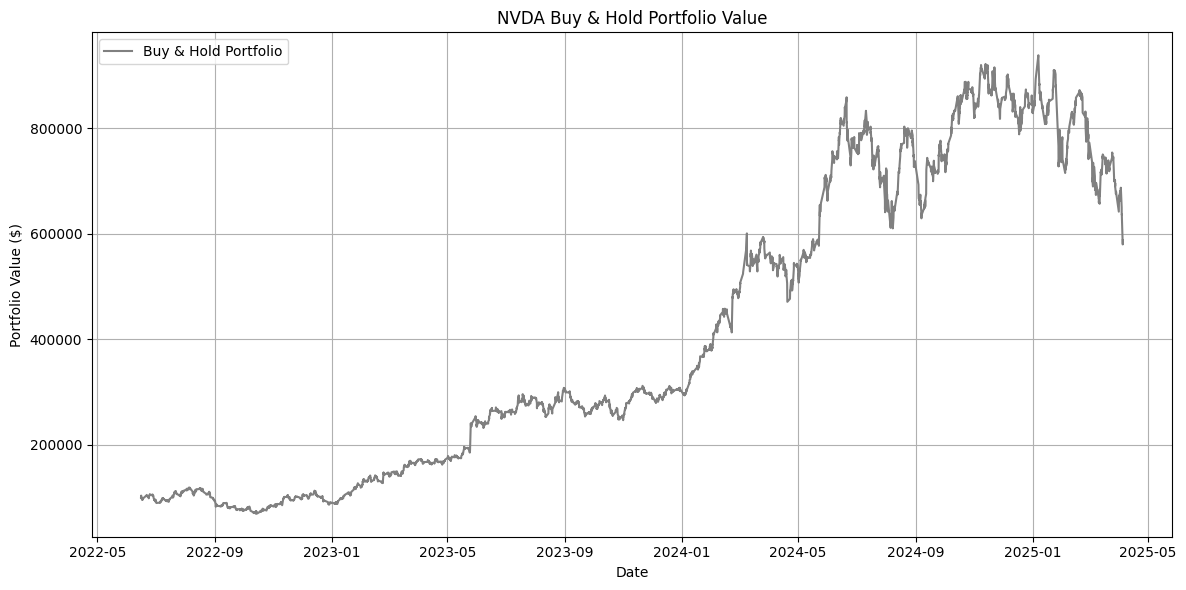

(np.float64(587946.3491350469), np.float64(487.9463491350469))

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

#Load TD3 result for NVDA
file_path = "td3_results_NVDA.csv"
df_nvda = pd.read_csv(file_path)

#Ensure Datetime column is parsed
if "Datetime" in df_nvda.columns:
    df_nvda["Datetime"] = pd.to_datetime(df_nvda["Datetime"])

#Drop initial 50 bars to match training offset
df_nvda = df_nvda.iloc[50:].reset_index(drop=True)

#Simulate Buy & Hold strategy
initial_balance = 100000
buy_price = df_nvda["Close"].iloc[0]
final_price = df_nvda["Close"].iloc[-1]
buy_hold_value = (initial_balance / buy_price) * final_price

#Calculate cumulative return
buy_hold_return = ((buy_hold_value / initial_balance) - 1) * 100

#Plot Buy & Hold portfolio value
buy_hold_curve = (initial_balance / buy_price) * df_nvda["Close"]

plt.figure(figsize=(12, 6))
plt.plot(df_nvda["Datetime"], buy_hold_curve, label="Buy & Hold Portfolio", color="gray")
plt.title("NVDA Buy & Hold Portfolio Value")
plt.xlabel("Date")
plt.ylabel("Portfolio Value ($)")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

buy_hold_value, buy_hold_return
